# Group spins that belong to the same pentagon

The objective of this script is to build a method to group spins belonging to the same pentagon. This way, we will assign to each pentagon a certain degree of chirality coming from the spins directions. 

In [1]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

import matplotlib.pyplot as plt
ureg = ice.ureg
from string import Template

%load_ext autoreload
%autoreload 2

from scipy.spatial import Voronoi, voronoi_plot_2d

First, we generate our set of center points of the cairo lattice

In [2]:
def unit_cell_Cairo_periodic(a):
    
        
    """This function generates a unit cell of a Cairo lattice. The input parameter is the size of the shorter side.
    The output of the function is the (x,y) collection of the unit cells (centers) and the directions of the spins. This function will define the Cairo lattice as a squere lattice in order to set periodic boundaries."""

    ureg = ice.ureg
    l = 1.37*a
    torad = np.pi/180

    centers = [[0,0,0], # First plaquette 
                [(417/890)*l*np.cos(30*torad),a/2+(417/890)*l*np.sin(30*torad),0],
                [-(417/890)*l*np.cos(30*torad),a/2+(417/890)*l*np.sin(30*torad),0],
                [(417/890)*l*np.cos(30*torad),-a/2-(417/890)*l*np.sin(30*torad),0],
                [-(417/890)*l*np.cos(30*torad),-a/2-(417/890)*l*np.sin(30*torad),0],
                
                [a/2+(l*(np.cos(30*torad)+np.cos(60*torad))),0,0],# Second plaquette
                [l*np.cos(30*torad)+(473/890)*l*np.cos(60*torad),(417/890)*l*np.sin(60*torad),0],
                [l*np.cos(30*torad)+(473/890)*l*np.cos(60*torad),-(417/890)*l*np.sin(60*torad),0],
                [a+(l*(np.cos(30*torad)+np.cos(60*torad)))+(417/890)*l*np.cos(60*torad),(417/890)*l*np.sin(60*torad),0],
                [a+(l*(np.cos(30*torad)+np.cos(60*torad)))+(417/890)*l*np.cos(60*torad),-(417/890)*l*np.sin(60*torad),0],
                
                [0,-a/2-l*(np.cos(30*torad)+np.cos(60*torad)),0],# Third plaquette
                [a/2+(417/890)*l*np.sin(30*torad),-a/2-l*np.cos(60*torad)-(473/890)*l*np.cos(30*torad),0],
                [-a/2-(417/890)*l*np.cos(60*torad),-a/2-l*np.cos(60*torad)-(473/890)*l*np.cos(30*torad),0],
                [-a/2-(417/890)*l*np.sin(30*torad),-a/2-l*np.cos(60*torad)-l*np.cos(30*torad)-(417/890)*l*np.cos(30*torad),0],
                [a/2+(417/890)*l*np.cos(60*torad),-a/2-l*np.cos(60*torad)-l*np.cos(30*torad)-(417/890)*l*np.cos(30*torad),0],
                
                [a/2+(l*(np.cos(30*torad)+np.cos(60*torad))),-a/2-l*(np.cos(30*torad)+np.cos(60*torad)),0],# Fourth plaquette
                [a/2+l*np.cos(60*torad)+(473/890)*l*np.cos(30*torad),-l*np.cos(30*torad)-(473/890)*l*np.cos(60*torad),0],
                
               [a/2+l*np.cos(60*torad)+l*np.cos(30*torad)+(417/890)*l*np.sin(60*torad),-l*np.cos(30*torad)-(473/890)*l*np.cos(60*torad),0],
                [a/2+l*np.cos(60*torad)+(473/890)*l*np.cos(30*torad),-l*np.cos(30*torad)-l*np.cos(60*torad)-a-(417/890)*l*np.sin(30*torad),0],
                [a/2+l*np.cos(60*torad)+l*np.cos(30*torad)+l*(417/890)*np.cos(30*torad),-l*np.cos(30*torad)-l*np.cos(60*torad)-a-(417/890)*l*np.cos(60*torad),0]
              ]*ureg.um
    directions = [[0,a,0],# First plaquette
                  [a*np.cos(30*torad),a*np.sin(30*torad),a*0],
                  [-a*np.cos(30*torad),a*np.sin(30*torad),a*0],
                  [a*np.cos(30*torad),-a*np.sin(30*torad),a*0],
                  [-a*np.cos(30*torad),-a*np.sin(30*torad),a*0],
                  
                  [a,0,0],# Second plaquette 
                  [-a*np.cos(60*torad),a*np.sin(60*torad),0],
                  [a*np.cos(60*torad),a*np.sin(60*torad),0],
                  [a*np.cos(60*torad),a*np.sin(60*torad),0],
                  [-a*np.cos(60*torad),a*np.sin(60*torad),0],
                  
                  [a,0,0], #Third plaquette
                  [a*np.cos(60*torad),a*np.sin(60*torad),0],
                  [-a*np.cos(60*torad),a*np.sin(60*torad),0],
                  [a*np.cos(60*torad),a*np.sin(60*torad),0],
                  [-a*np.cos(60*torad),a*np.sin(60*torad),0],
                  
                  [0,a,0], # Fourth plaquette
                  [-a*np.cos(30*torad),a*np.sin(30*torad),a*0],
                  [a*np.cos(30*torad),a*np.sin(30*torad),a*0],
                  [a*np.cos(30*torad),a*np.sin(30*torad),a*0],
                  [a*np.cos(30*torad),-a*np.sin(30*torad),a*0]
                 ]*ureg.um
    
    
    return centers, directions

centers, directions = unit_cell_Cairo_periodic(19.5458)

In [3]:
#np.random.seed()

#l = 2
#a = 19.5458*ureg.um
#sp = sup.spins()
#ureg = ice.ureg
#sp.create_lattice(geometry = "cairo",size =[l,l],lattice_constant=19.5458*ureg.um, border="periodic")

In [4]:
#fig, ax1 = plt.subplots(figsize=(10,7))
#sp.display(ax1)

In [5]:
for i in centers:
    print(i.magnitude)

[0. 0. 0.]
[10.86552456 16.04611353  0.        ]
[-10.86552456  16.04611353   0.        ]
[ 10.86552456 -16.04611353   0.        ]
[-10.86552456 -16.04611353   0.        ]
[46.35198129  0.          0.        ]
[30.30586776 10.86552456  0.        ]
[ 30.30586776 -10.86552456   0.        ]
[62.39809482 10.86552456  0.        ]
[ 62.39809482 -10.86552456   0.        ]
[  0.         -46.35198129   0.        ]
[ 16.04611353 -35.48645673   0.        ]
[-16.04611353 -35.48645673   0.        ]
[-16.04611353 -57.21750585   0.        ]
[ 16.04611353 -57.21750585   0.        ]
[ 46.35198129 -46.35198129   0.        ]
[ 35.48645673 -30.30586776   0.        ]
[ 57.21750585 -30.30586776   0.        ]
[ 35.48645673 -62.39809482   0.        ]
[ 57.21750585 -62.39809482   0.        ]


/home/carolina/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


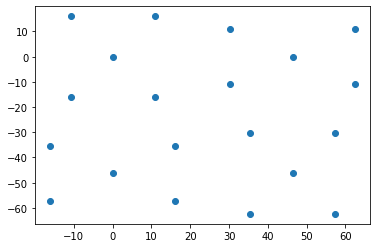

In [27]:
plt.plot(centers[:,0],centers[:,1],'o')

In [22]:
points = []
for i in centers:
    points.append([i.magnitude[0],i.magnitude[1]])

In [7]:
points = np.array(points)

In [19]:
vor = Voronoi(points)

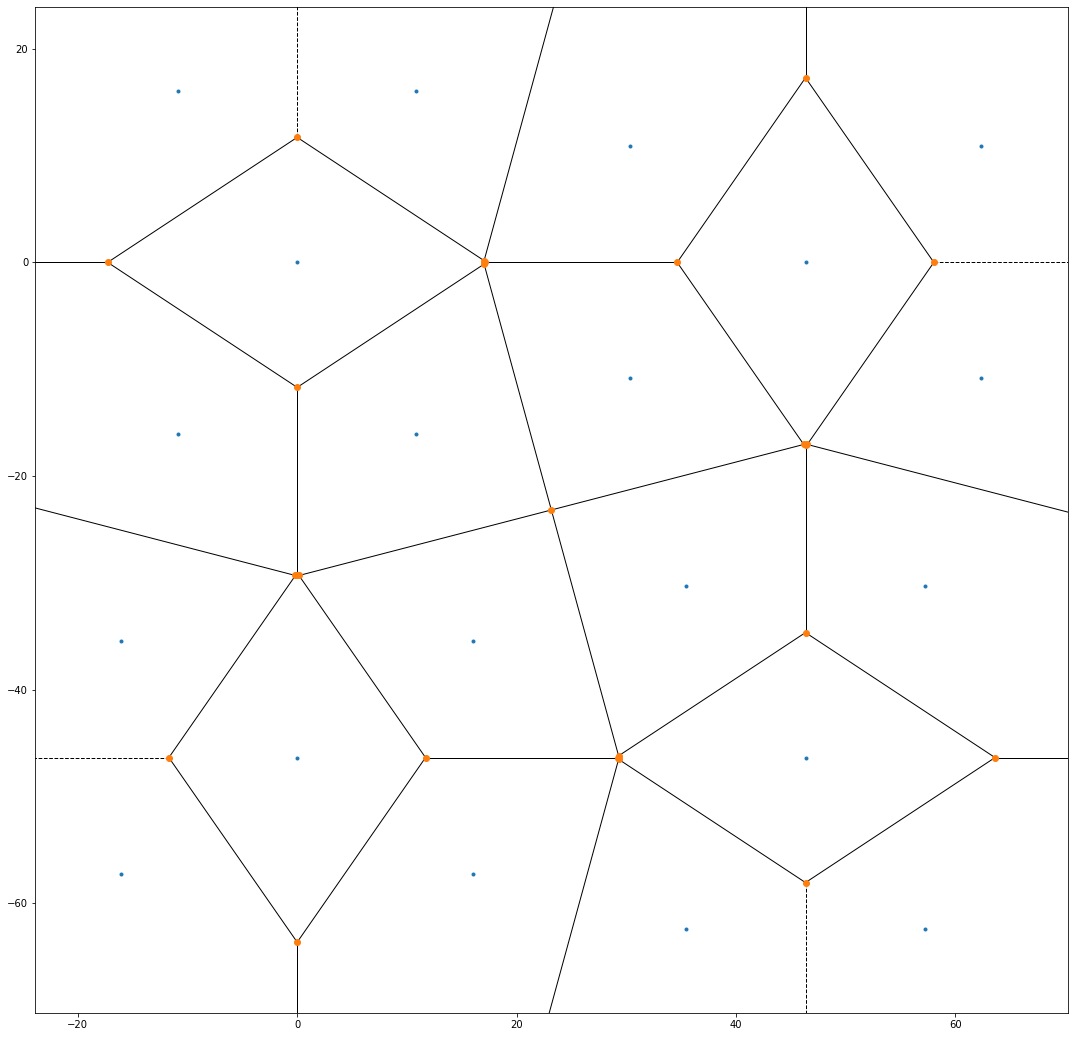

In [20]:
fig = voronoi_plot_2d(vor)
fig.set_size_inches(18.5, 18.5)

In [10]:
vor.vertices

array([[ 0.00000000e+00, -1.17018175e+01],
       [-1.10144715e+02,  0.00000000e+00],
       [-1.72811437e+01,  3.55271368e-15],
       [ 4.63519813e+01, -1.71007353e+01],
       [ 1.56496696e+02, -4.63519813e+01],
       [ 5.80537988e+01,  0.00000000e+00],
       [ 4.65133105e+01, -1.70428941e+01],
       [ 7.10542736e-15, -1.56496696e+02],
       [ 4.61906521e+01, -1.70428941e+01],
       [ 1.70428941e+01, -1.61329217e-01],
       [ 2.31759906e+01, -2.31759906e+01],
       [ 0.00000000e+00,  1.17018175e+01],
       [ 2.93090872e+01, -4.65133105e+01],
       [ 2.92512460e+01, -4.63519813e+01],
       [ 2.93090872e+01, -4.61906521e+01],
       [ 4.63519813e+01, -3.46501638e+01],
       [ 6.36331250e+01, -4.63519813e+01],
       [ 4.63519813e+01, -5.80537988e+01],
       [ 0.00000000e+00, -2.92512460e+01],
       [-1.61329217e-01, -2.93090872e+01],
       [ 1.61329217e-01, -2.93090872e+01],
       [-1.17018175e+01, -4.63519813e+01],
       [ 1.95618932e-15, -6.36331250e+01],
       [ 1.

In [11]:
l = vor.ridge_vertices
a = [ x for x in l if -1 not in x ]

In [12]:
a 

[[4, 6],
 [5, 6],
 [1, 2],
 [2, 11],
 [12, 17],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [16, 17],
 [7, 12],
 [8, 10],
 [3, 8],
 [10, 14],
 [3, 15],
 [3, 6],
 [4, 16],
 [18, 19],
 [18, 20],
 [19, 21],
 [20, 23],
 [21, 22],
 [22, 23],
 [0, 2],
 [0, 18],
 [1, 19],
 [9, 10],
 [10, 20],
 [0, 9],
 [13, 23],
 [7, 22],
 [24, 26],
 [24, 25],
 [25, 28],
 [26, 27],
 [27, 28],
 [8, 26],
 [5, 24],
 [11, 28],
 [9, 27]]

In [13]:
vor.regions

[[6, 4, -1, 5],
 [11, 2, 1, -1],
 [17, 12, 13, 14, 15, 16],
 [17, -1, 7, 12],
 [15, 3, 8, 10, 14],
 [16, 4, 6, 3, 15],
 [17, -1, 4, 16],
 [23, 20, 18, 19, 21, 22],
 [19, 1, 2, 0, 18],
 [20, 10, 9, 0, 18],
 [21, -1, 1, 19],
 [23, 13, 14, 10, 20],
 [22, 7, -1, 21],
 [23, 13, 12, 7, 22],
 [28, 25, 24, 26, 27],
 [26, 8, 3, 6, 5, 24],
 [25, -1, 5, 24],
 [28, 11, -1, 25],
 [27, 9, 10, 8, 26],
 [28, 11, 2, 0, 9, 27]]

In [14]:
def flatten(a):
    return [item for sublist in a for item in sublist]

In [15]:
new = flatten(a)

In [16]:
new

[4,
 6,
 5,
 6,
 1,
 2,
 2,
 11,
 12,
 17,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17,
 7,
 12,
 8,
 10,
 3,
 8,
 10,
 14,
 3,
 15,
 3,
 6,
 4,
 16,
 18,
 19,
 18,
 20,
 19,
 21,
 20,
 23,
 21,
 22,
 22,
 23,
 0,
 2,
 0,
 18,
 1,
 19,
 9,
 10,
 10,
 20,
 0,
 9,
 13,
 23,
 7,
 22,
 24,
 26,
 24,
 25,
 25,
 28,
 26,
 27,
 27,
 28,
 8,
 26,
 5,
 24,
 11,
 28,
 9,
 27]

In [17]:
count = []
for i in new:
    count.append(new.count(i))
    


In [18]:
count

[2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3]

    I didn't get what expected. I observed that in the 5 ridge vertices there are two points. That means two vertices. That's why I obtained only vertçices with 3 instead of vertices with 5. I will reject this procedure since I don't know how to solve it.